compare different cities by their aggregated momepy metrics 

In [1]:
import pandas as pd
import configparser
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import ast

In [2]:
# Read the configuration file
config = configparser.ConfigParser()
config_file = 'config.ini'

# Check if file exists
if not os.path.isfile(config_file):
    # Create a simple config file
    config['Paths'] = {
        'gdb_folder': '/path/to/your/gdb/folder',
        'output_dir': '/path/to/your/output/folder'
    }
    with open(config_file, 'w') as configfile:
        config.write(configfile)
    print(f"Created configuration file '{config_file}'.")

# Read the configuration file
config.read(config_file)
gdb_folder = config['Paths']['gdb_folder']
output_dir = config['Paths']['output_dir']
output_folder = config['Paths']['output_folder']


In [3]:
# Read the CSV files into DataFrames
city_metrics = pd.read_csv(os.path.join(output_folder, 'city_metrics.csv'))
city_properties = pd.read_csv(os.path.join(output_folder, 'city_properties.csv'))
city_sem = pd.read_csv(os.path.join(output_folder, 'city_sem.csv'))
# merge all city properties into a single table
city_props = city_properties.merge(city_sem, on='city', how='left').merge(city_metrics, on='city', how='left')

correlation_df = pd.read_csv(os.path.join(output_folder, 'correlation.csv'))


In [4]:
correlation_df[['col1', 'col2']] = correlation_df['Metric_Property_Pair'].apply(lambda x: pd.Series(ast.literal_eval(x)))
correlation_df.drop(columns='Metric_Property_Pair', inplace=True)
correlation_df['abs_col'] = abs(correlation_df['Correlation_Value'])
correlation_df.sort_values(by='abs_col', ascending=False, inplace=True)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplot_with_labels_old(df, col1, col2, ax=None):
    one_plot = False
    if ax is None:
        one_plot = True
        fig, ax = plt.subplots(figsize=(10, 10))

    # Create a color map
    unique_cities = df['city'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_cities)))
    color_dict = dict(zip(unique_cities, colors))

    # Create a scatterplot with color-coded points
    for city in unique_cities:
        city_data = df[df['city'] == city]
        ax.scatter(city_data[col1], city_data[col2], 
                   c=[color_dict[city]], 
                   s=200, 
                   label=city)

    # Add labels to each data point
    for i, row in df.iterrows():
        x = row[col1]
        y = row[col2]
        city_name = row['city']
        ax.annotate(city_name, 
                    (x, y),
                    xytext=(-5, 5),
                    textcoords='offset points',
                    fontsize=24,
                    ha='left',
                    va='bottom')

    # Set labels and tick parameters
    ax.set_xlabel(col1.replace('_', ' '), fontsize=16)
    ax.set_ylabel(col2.replace('_', ' '), fontsize=16)
    ax.tick_params(labelsize=14)

    # Remove the legend
    ax.legend().remove()

    # Set equal aspect ratio
    #ax.set_aspect('equal', adjustable='box')

    if one_plot:
        plt.tight_layout()
        plt.show()
    
    return ax

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes

def scatterplot_with_labels_bax(df, col1, col2, ax=None, broken_x=None):
    one_plot = False
    if ax is None:
        one_plot = True
        fig = plt.figure(figsize=(10, 10))

    # Create a color map
    unique_cities = df['city'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_cities)))
    color_dict = dict(zip(unique_cities, colors))

    if broken_x is not None:
        sorted_x = sorted(df[col1])
        print(sorted_x)
        break_point = (sorted_x[-2] + sorted_x[-1]) / 2
        bax = brokenaxes(xlims=((min(df[col1]), sorted_x[-2]*1.05), (sorted_x[-1]*0.9, max(df[col1])*1.1)), hspace=0.05)
        ax = bax.axs[0]
    else:
        if ax is None:
            ax = fig.add_subplot(111)

    # Create a scatterplot with color-coded points
    for city in unique_cities:
        city_data = df[df['city'] == city]
        ax.scatter(city_data[col1], city_data[col2], 
                   c=[color_dict[city]], 
                   s=200, 
                   label=city)

    # Add labels to each data point
    for i, row in df.iterrows():
        x = row[col1]
        y = row[col2]
        city_name = row['city']
        ax.annotate(city_name, 
                    (x, y),
                    xytext=(-5, 5),
                    textcoords='offset points',
                    fontsize=24,
                    ha='left',
                    va='bottom')

    # Set labels and tick parameters
    ax.set_xlabel(col1.replace('_', ' '), fontsize=16)
    ax.set_ylabel(col2.replace('_', ' '), fontsize=16)
    ax.tick_params(labelsize=14)

    # Remove the legend
    ax.legend().remove()

    if one_plot:
        if not broken_x:
            plt.tight_layout()
        plt.show()
    
    return ax

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterplot_with_labels(df, col1, col2, ax=None):
    # Create a scatterplot with color-coded points
    one_plot = False
    if ax is None:
        one_plot = True
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))

    scatter = sns.scatterplot(data=df, x=col1, y=col2, hue='city', ax=ax, legend=False, s=200)

    # Add labels to each data point
    for i, row in df.iterrows():
        x = row[col1]
        y = row[col2]
        city_name = row['city']
        ax.annotate(city_name, 
                    (x, y),
                    xytext=(0, 2),#*len(city_name), -4*len(city_name)),
                    textcoords='offset points',
                    fontsize=12,
                    rotation=30,
                    ha='left',
                    va='center')

    # Set labels and tick parameters
    ax.set_xlabel(col1.replace('_', ' '), fontsize=16)
    ax.set_ylabel(col2.replace('_', ' '), fontsize=16)
    ax.tick_params(labelsize=14)

    # Return the ax object
    if one_plot:
        plt.show()
    return ax

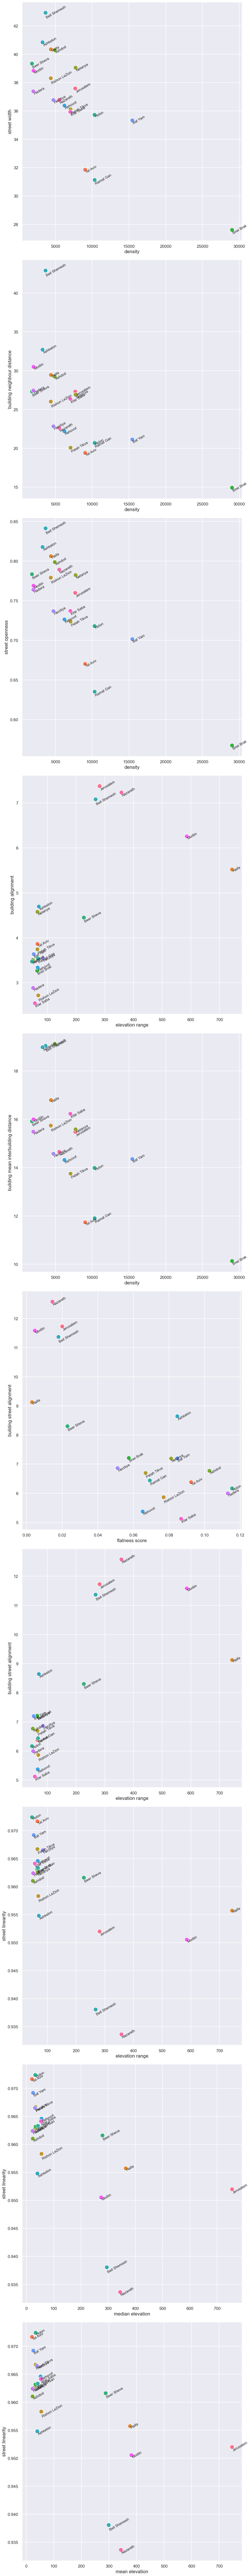

In [133]:
N = 10
if N > 0:
    fig, axes = plt.subplots(N, 1, figsize=(12, 12*N))

for i in range(N):
    col1, col2 = correlation_df.iloc[i]['col2'], correlation_df.iloc[i]['col1']
    scatterplot_with_labels(city_props, col1, col2, axes[i])

plt.tight_layout()
plt.show()

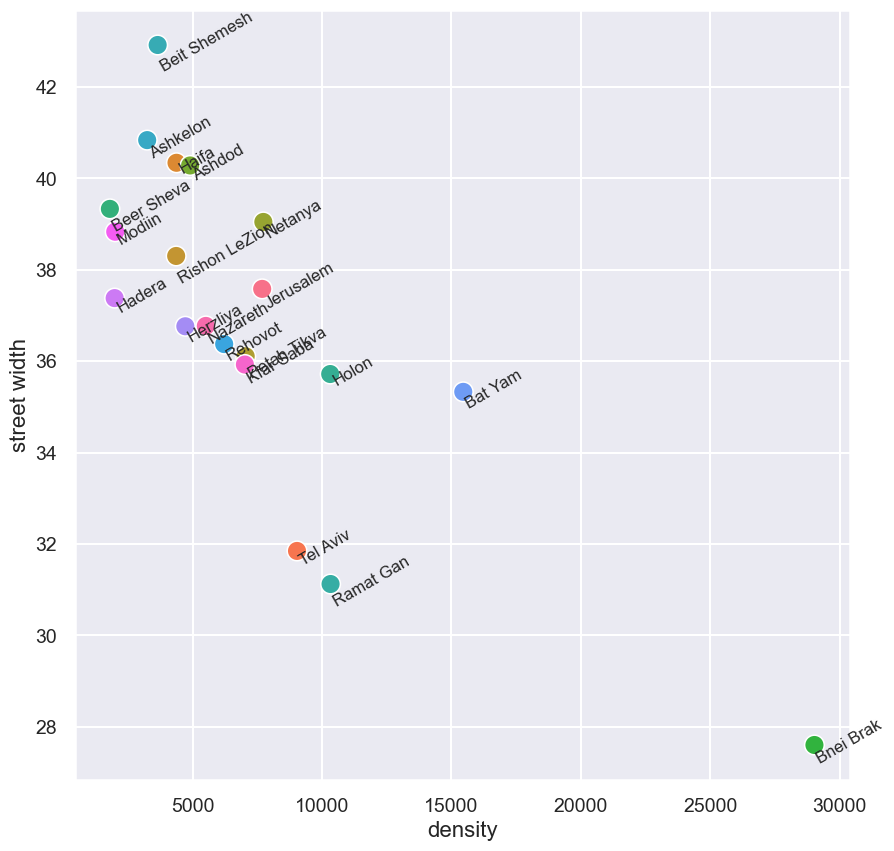

In [134]:
i=0
#sns.set_style('white')
#sns.set_theme('talk')
col1, col2 = correlation_df.iloc[i]['col2'], correlation_df.iloc[i]['col1']
scatterplot_with_labels(city_props, col1, col2)
plt.show()

In [139]:
city_props[['city', 'density', 'street_width']]

,city,density,street_width
0,Jerusalem,7685.0,37.581172
1,Tel Aviv,9031.0,31.847229
2,Haifa,4374.0,40.340581
3,Rishon LeZion,4361.0,38.301785
4,Petah Tikva,7048.0,36.106490
5,Netanya,7730.0,39.046387
6,Ashdod,4900.0,40.282036
7,Bnei Brak,29027.0,27.601236
8,Beer Sheva,1800.0,39.331925
9,Holon,10314.0,35.718410


In [7]:
# Old code, I'm keeping it here for reference
# add the cities database from Wikipedia
# Source URL: https://he.wikipedia.org/wiki/ערים_בישראל
# Then use this tool to download:
#  https://wikitable2csv.ggor.de
# I then manually translated the column names and saved as CSV
# Use table selector: .toccolours

cities = pd.read_csv('data/cities_israel.csv')
# dictionary of Hebrew to English city names
hebrew_to_english = {
    'ירושלים': 'Jerusalem',
    'תל אביב-יפו': 'Tel Aviv',
    'חיפה': 'Haifa',
    'ראשון לציון': 'Rishon LeZion',
    'פתח תקווה': 'Petah Tikva',
    'אשדוד': 'Ashdod',
    'נתניה': 'Netanya',
    'באר שבע': 'Beer Sheva',
    'בני ברק': 'Bnei Brak',
    'חולון': 'Holon',
    'הרצליה': 'Herzliya',
    'רחובות': 'Rehovot',
    'מודיעין-מכבים-רעות': 'Modiin',
    'חריש': 'Harish',
    'כרמיאל': 'Carmiel',
    'חדרה': 'Hadera',
    'אריאל': 'Ariel',
    'עכו': 'Acre'
}

# Function to translate city names
def translate_city(name):
    return hebrew_to_english.get(name, name)  # If not found, return the original name

# Apply the translation to the 'name' column
cities['name_english'] = cities['name'].apply(translate_city)

# remove various signs
cities_columns = ['name_english', 'area', 'density', 'population', 'growth rate', 'socioeconomic', 'year founded']

for c in cities_columns:
    if c in ['name', 'name_english']:
        continue
    cities[c] = cities[c].astype(str).apply(lambda x: re.sub(r'[%,]', '', x)).astype(float)
    